# Machine learning project

**Content**

1. [Definition](#definition)
2. [Data Analysis](#data_analysis)
3. [Functions for data processing](#functions)
4. [Data visualisation and pre-processing](#visualization)
5. [Model creation and applying](#models)
6. [Conclusions](#conclusions)

## 1. Definition <a class='anchor' id='definition'>

### Overview

Dataset which is used in the current task was taken from kaggle contest.
https://www.kaggle.com/c/realestatepriceprediction/data


Main goal of this contest was predict price of appartment based, on set of features which characterizes these appartments.

### Problem statement

In the current project price of appartment from test dataset is going to be predicted.
There are several models of different types will be created and then their results will be compared to found the most optimal model which fit best for Price prediction.

Price prognosos is the regression question and target variable has continiuous range of values. 
When counting parameters of existing appartments we are going to predict price for other appartments described by the same set of features.

Main goal: Find the model which will be able predict value of target variable for each new object.
Quality of prediction will be R2 score.

### Metrics

There are three metrics which can be used for regression tasks.

- Mean_absolute_error
- Mean Square Error
- R2_score

Quality of model will be verified based on R2 score which should be close to 1.0 as close as it is possible.

### Model selection

For the current tasks followinf models will be applied for comparing of results:
- Lienar Regression
- Random Forrest Regressor
- Gradient Boosting

### Modules import

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
%matplotlib inline

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, RepeatedKFold

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
from sklearn.linear_model import Lasso, Ridge

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
from random import randint, random

In [14]:
# garbage collector
import gc 

In [15]:
from catboost import CatBoostRegressor

Creation of empty dataframe for result storing

In [16]:
result = pd.DataFrame(columns=['Model_type','data_proprocessing','R2_score', 'MAE', 'MSE'], dtype = object)

## 2. Data analysis <a class='anchor' id='data_analysis'>

### Data Preparation

Dataset which is used in the current task was taken from kaggle contest.
https://www.kaggle.com/c/realestatepriceprediction/data

Id columns will be used as index because this field should be unique and does not any valueable information for prediction process.

In [17]:
df = pd.read_csv("D:\\Learning\\GeekBrains\\numpy and pandas\\Final project\\train.csv", index_col='Id' )

In [18]:
df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

#### Data fields/Features
- Id - id of appartment
- DistrictId - id of district where appartment is
- Rooms - number of rooms in apartment
- Square - area of appartment
- LifeSquare - value of life square of appartment
- KitchenSquare - value of kitchen square of appartment
- Floor - floor where appartment is.
- HouseFloor - number of floors of the house.
- HouseYear - year where house was built.
- Ecology_1, Ecology_2, Ecology_3 - ecological features of region
- Social_1, Social_2, Social_3 - social features of region
- Healthcare_1, Helthcare_2 - features of reagion related to healthcare
- Shops_1, Shops_2 - features which describe existiong of shops, trade centers etc nearby
- Price - target value. Price of appartment

In [19]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [20]:
df.shape

(10000, 19)

In [21]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


The most of fields have anomalies and outliers.

Distribution of target variable:

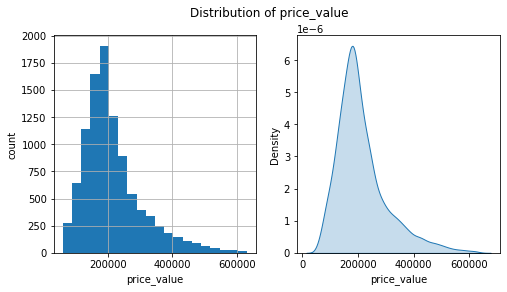

In [22]:
plt.figure(figsize = (8, 4))

plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('price_value')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('price_value')

plt.suptitle('Distribution of price_value')
plt.show()

In [23]:
df['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

Dispersion of target variable is closed to normal, non-symmetrical. 

It looks like that changes or processing of target variable Price is not required.

### Columns with null data

In [24]:
df.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

'LifeSquare' and 'Healthcare_1' columns contains a lot of null data.

Training dataset contains 10000 entries.

So persent of missing data for 'LifeSquare' is 21.13 ad for Healthcare_1 is 47.98.

#### Columns with anomalies/outliers

In [25]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [26]:
df[(df['KitchenSquare'] > df['Square']) | (df['LifeSquare'] > df['Square'])].count()

DistrictId       486
Rooms            486
Square           486
LifeSquare       486
KitchenSquare    486
Floor            486
HouseFloor       486
HouseYear        486
Ecology_1        486
Ecology_2        486
Ecology_3        486
Social_1         486
Social_2         486
Social_3         486
Healthcare_1     170
Helthcare_2      486
Shops_1          486
Shops_2          486
Price            486
dtype: int64

Amount of columns where floor value exceeds general amount of floor.

In [27]:
df[df['Floor'] > df['HouseFloor']].count()

DistrictId       1825
Rooms            1825
Square           1825
LifeSquare       1210
KitchenSquare    1825
Floor            1825
HouseFloor       1825
HouseYear        1825
Ecology_1        1825
Ecology_2        1825
Ecology_3        1825
Social_1         1825
Social_2         1825
Social_3         1825
Healthcare_1      861
Helthcare_2      1825
Shops_1          1825
Shops_2          1825
Price            1825
dtype: int64

Data for cases above will be transformed in the next sections.

#### Categorial variables

The most part of columns contains numerical data, but three of them have object/category data type:
- Ecology_2 
- Ecology_3
- Shops_2 

During further processing object datatypes will be changed to their numerical equivalents.

In [28]:
df.select_dtypes(include=['object', 'category'])

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B
...,...,...,...
77,B,B,B
6159,B,B,A
5123,B,B,A


Changing of datatypes and converting of columns is not required.

## 3. Functions for data processing <a class='anchor' id='functions'>

This section contains functions which can be used in next sections to simplify performing of some operations.

In [29]:
def evaluate_preds(true_values, pred_values, save=False):
    """Evaluation of model quality preds vs true"""
    
    print("R2:\t" + str(round(r2_score(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mean_squared_error(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mean_squared_error(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # line where true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [568]:
class Data_preprocessing():
    def __init__(self):
        # Treshold values.
        self.rooms_l_trsh = 1
        self.rooms_h_trsh = 5
        
        self.min_kitchen_trsh = 3
        self.max_kitchen_trsh = 100
        
        self.extra_square = 3
        
        #median values intializing
        self.kc_median = 0
        self.ls_median = 0
        self.yr_median = 0
        self.hf_median = 0
        self.rm_median = 0
        
        #temporary dataframes for validation processing
        
        
    def median_calculation(self, dfr):
        """Function calculates median values and then these values can be used for gaps filling"""
        # all changes for dataframe in this function were made according to feature analysis in section 4
        # median values for dataframes. Median values will be used for data preprocessing and gaps filling.
        self.kc_median = dfr['KitchenSquare'].median()
        self.ls_median = dfr['LifeSquare'].median()
        self.yr_median = dfr['HouseYear'].median()
        self.hf_median = dfr['HouseFloor'].median()
        self.rm_median = dfr['Rooms'].median()
    
    
    def add_features(self, dfr):
        """Adds some new features"""
        # Average square per room in each appartment
        dfr['avg_room_square'] = (dfr['Square']/dfr['Rooms']).astype('float32')
        
        #if 'Price' in dfr.columns:
            # Average cost of 1 m2 per district            
            #dfr['sq_m_price'] = dfr['Price']/dfr['Square']
            #square_cost_per_district = dfr.groupby(['DistrictId'], as_index = False).agg({'sq_m_price':'median'})

            
            # Average appartment price depends on district
            #dfr['Avg_Price_per_district'] = np.NaN
            #dfr['Avg_Price_per_district'] = np.round(dfr['Avg_Price_per_district']\
            #                                         .fillna(dfr.groupby('DistrictId')['Price']\
            #                                         .transform('mean')), 0)
            
        # Ratio between kitchen square and square
        dfr['gen_square_kitchen'] = (dfr['KitchenSquare']/dfr['Square']).astype('float32')
        return dfr
    
    
    def clear_features(self, dfr):
        """function that clears extra datafeatures"""
        return dfr
        

    def data_clearing (self, dfr):
        """function is need to dataset processing and clearing of data"""  
        
        # Rooms
        dfr.loc[dfr['Rooms'] < self.rooms_l_trsh, 'Rooms'] = self.rooms_l_trsh
        dfr.loc[dfr['Rooms'] >= self.rooms_h_trsh, 'Rooms'] = self.rm_median #or can be set to 5? Change condition to 5 too?
    
    
        #Kitchen square
        dfr.loc[dfr['KitchenSquare'] < self.min_kitchen_trsh, 'KitchenSquare'] = self.min_kitchen_trsh
        dfr.loc[dfr['KitchenSquare'] > self.max_kitchen_trsh, 'KitchenSquare'] = self.kc_median
        dfr.loc[dfr['KitchenSquare'] > dfr['Square'], 'KitchenSquare'] = self.kc_median # ????????????????????????????
    
        
        #House Floor and Floor
        dfr.loc[dfr['HouseFloor']==0, 'HouseFloor'] = dfr['Floor']
        dfr.loc[(dfr['Floor'] > dfr['HouseFloor']), 'Floor'] = round(dfr['HouseFloor'] * random(), 0)
    
        #House Year
        dfr.loc[dfr['HouseYear'] > 2021, 'HouseYear'] = self.yr_median
    
        return dfr
  

    def null_populating_hc(self, dfr, action = 'm'):
        """Function will populate null values for Healthcare_1 in dataframe based on accepted descision"""
        #Healthcare_1
        if 'Healthcare_1' in dfr.columns:
            if action == 'd':
                dfr = dfr.drop('Healthcare_1', axis = 1)
            if action == 'm':
                #dfr = dfr.fillna(df['Healthcare_1'].median())
                healthcare_per_district = dfr.groupby(['DistrictId'], as_index = False).agg({'Healthcare_1':'median'})
                
                healthcare_per_district = healthcare_per_district.rename(columns={'Healthcare_1':'hl_pd'})
                idx = dfr.index
                dfr = dfr.merge(healthcare_per_district, how = 'left', on='DistrictId')
                dfr = dfr.set_index(idx)
                
                #fill na if after merge we will have any gaps
                if dfr['Healthcare_1'].isnull().sum() != 0:
                    dfr['Healthcare_1'] = dfr.fillna(dfr['hl_pd'].median())
       
        return dfr

    
    def null_populating_ls(self, dfr, action = 'm'):
        """Fill null values for LifeSquare"""
        #LifeSquare
        comparing_condition = ((dfr['LifeSquare'].isnull()) | (dfr['LifeSquare'] > (dfr['Square'] - dfr['KitchenSquare'])))
        dfr.loc[comparing_condition, 'LifeSquare'] = \
        dfr.loc[comparing_condition, 'Square'] - dfr.loc[comparing_condition, 'KitchenSquare'] - self.extra_square
        
        return dfr

    def normalization(self, dfr, sc_type = 'standard'):
        """Function which is needed for data normalization for linear regression etc"""
        index_col = dfr.index
        num_features = dfr.select_dtypes(include=['float64', 'float32', 'float16', 'int64', 'int32', 'int16', 'int8']).columns
    
        if sc_type == 'standard':
            scaler = StandardScaler()
        elif sc_type == 'minmax':
            scaler = MinMaxScaler()
        else:
            scaler = RobustScaler()
            
        scaled = scaler.fit_tansform(dfr)
        dfr_scaled = pd.DataFrame(scaled, columns=num_feature_names)
        dfr_scaled = set_index(index_col)
        
        dfr['Healthcare_1'] = dfr['Healthcare_1'].astype('int8')
        
        return dfr_scaled
       
    def district_id_processing(self, dfr):
        """Function converts DistrictId to AvgPrice per district. In case of validation dataset uses Price 
            from train dataset.
        """
        if 'Price' in dfr.columns:
            self.df_prices_district = dfr[['Price', 'DistrictId']].copy()
            self.df_prices_district['Avg_Price_per_district'] = round(self.df_prices_district.groupby('DistrictId')['Price']\
                                                         .transform('mean'), 0)
            self.df_prices_district = self.df_prices_district.drop('Price', axis = 1)
            dfr = dfr.merge(self.df_prices_district['Avg_Price_per_district'], how = 'left', left_index=True, right_index=True)
            #dfr = dfr.drob()
            
        else:
            df_prices_distinct = self.df_prices_district.drop_duplicates('DistrictId')
            idx = dfr.index
            dfr = dfr.merge(df_prices_distinct, how = 'left', on='DistrictId')
            dfr = dfr.set_index(idx)
            if dfr['Avg_Price_per_district'].isnull().sum() != 0:
                dfr = dfr.fillna(method = 'pad') #also median value can be used
            
        return dfr
    


## 4. Data visualisation and pre-processing <a class='anchor' id='visualization'>

Visualisation:
- Histograms for numeric variables distribution
- Boxplots before and after pre-processing
- Distribution of categorial variables.

Preprocessing:

1. remove columns with lack of data
2. Change NaN to appropriate group median values
3. Change categorial features to numerical
4. Normalization of data (optional)
5. regularization of data (optional)

Creattion of copy of initial dataset for preprocessing.

In [569]:
df_fill = df.copy()
df_target = 'Price'

Initializing of class with preprocessing functions

In [281]:
df_fill.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Distribution of numeric variables:

In [282]:
df_num_features = df_fill.select_dtypes(include=['float64', 'float32', 'float16', 'int64', 'int32', 'int16', 'int8'])
df_num_features.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Price               0
dtype: int64

In [283]:
df_num_features = df_num_features.drop('Price', axis = 1)


Selecting of numerical features and check their distribution.

In [ ]:
df_num_features.hist(figsize=(12,12), bins=20, grid=False);

### Processing of features

In this section some features will be transformed to remove anomalies and outliers

Adding of new temporary features for analyze outliers.

Temporary columns. Will be deleted after completing of preprocessing.

In the rows below each feature will be processed individually and regarding of result analyze optimal way for feature processing will be chosen.

**Rooms**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


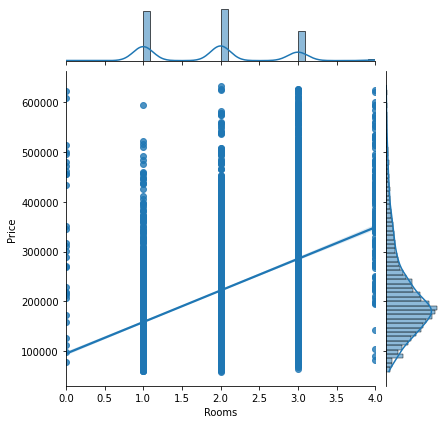

In [494]:
grid = sns.jointplot(df_fill['Rooms'], df_fill['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['Rooms'])
plt.xlabel('Rooms')
plt.show()

In [ ]:
df_fill['Rooms'].describe()

In [ ]:
df_fill['Rooms'].value_counts().sort_values()

All appartmets where rooms have zero value will be changed to 1

In [ ]:
df_fill[(df_fill['Rooms'] > 6)][['Rooms', 'avg_room_square']]

Resolving of outliers cases:
   - All values which are less than 1 will be converted to 1.0
   - All values which are greater or equal to six will be converted to median value. 

**Square**

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['Square'])
plt.xlabel('Square')
plt.show()

Square column will be left without changes

**Life square**

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['LifeSquare'])
plt.xlabel('LifeSquare')
plt.show()

In [ ]:
df_fill['LifeSquare'].isnull().sum()

In [ ]:
df_fill[df_fill['LifeSquare'] > df_fill['Square']]['LifeSquare'].count()

In [ ]:
df_fill[df_fill['LifeSquare'] == 0]['LifeSquare'].count()

Resolving of outliers:
- if LifeSquare is NaN or LifeSquare > Square, then LifeSquare will be changed to difference between Square and KitchenSquare and median difference between these differences.

**Kitchen Square**

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['KitchenSquare'])
plt.xlabel('KitchenSquare')
plt.show()

In [ ]:
# df_fill['KitchenSquare'].value_counts().sort_values()
df_fill['KitchenSquare'].describe()

In [ ]:
df_fill[(df['KitchenSquare'] > 80)]['KitchenSquare'].count()

In [ ]:
df_fill[(df['KitchenSquare'] > df_fill['LifeSquare'])]['KitchenSquare'].count()

Resolving of outliers:
- If Kitchen square > 100 it will be converted to median value
- If Kitchen square < 3 it will be converted to 3
- if Kitchen square > general square it will be converted to 3

**Floor and house floor**

In [ ]:
ax = sns.boxplot(data = df_fill[['Floor', 'HouseFloor']]                )
plt.show()

In [ ]:
df_fill[df_fill['Floor'] == 0]['Floor'].count()

In [ ]:
df_fill[df_fill['HouseFloor'] == 0]['HouseFloor'].count()

In [ ]:
df_fill[(df_fill['HouseFloor'] < df_fill['Floor']) ]['Floor'].count()

Resolvong of outliers:
- if HouseFloor == 0, value will be changed to Floor (or to median value of whole dataset - optional to be compared with result sxore)
- if Floor > HouseFloor, value will be changed to HouseFloor

**HouseYear**

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['HouseYear'])
plt.xlabel('HouseYear')
plt.show()

In [ ]:
df_fill[df_fill['HouseYear'] == 0]['HouseYear'].count()

In [ ]:
df_fill[df_fill['HouseYear'] < 1900]['HouseYear'].count()

In [ ]:
df_fill[df_fill['HouseYear'] > 2021]['HouseYear'].count()

Resolvong of outliers:
- if year > 2021 it will be changed to median year

**Healthcare_1**

Due to big amount of NaN values in Healthcare_1 column, it can be dropped

### Applying of data clearing

In [570]:
dp = Data_preprocessing()

Function from section 3 will be applied to test dataset

In [571]:
df_fill.shape

(10000, 19)

In [572]:
dp.median_calculation(df_fill)

In [573]:
df_fill = dp.data_clearing (df_fill)

In [574]:
df_fill = dp.null_populating_hc(df_fill)

In [575]:
df_fill = dp.null_populating_ls(df_fill)

In [576]:
df_fill = dp.district_id_processing(df_fill)

In [577]:
df_fill.shape

(10000, 21)

In [580]:
df_fill.isnull().sum()

DistrictId                0
Rooms                     0
Square                    0
LifeSquare                0
KitchenSquare             0
Floor                     0
HouseFloor                0
HouseYear                 0
Ecology_1                 0
Ecology_2                 0
Ecology_3                 0
Social_1                  0
Social_2                  0
Social_3                  0
Healthcare_1              0
Helthcare_2               0
Shops_1                   0
Shops_2                   0
Price                     0
hl_pd                     0
Avg_Price_per_district    0
dtype: int64

In [579]:
df_fill['hl_pd'] = df_fill['hl_pd'].fillna(df_fill['hl_pd'].median())

In [292]:
df_fill = df_fill.drop('hl_pd', axis = 1)

In [539]:
df_fill = df_fill.drop('DistrictId', axis = 1)

In [294]:
df_fill.isnull().sum()

Rooms                     0
Square                    0
LifeSquare                0
KitchenSquare             0
Floor                     0
HouseFloor                0
HouseYear                 0
Ecology_1                 0
Ecology_2                 0
Ecology_3                 0
Social_1                  0
Social_2                  0
Social_3                  0
Healthcare_1              0
Helthcare_2               0
Shops_1                   0
Shops_2                   0
Price                     0
Avg_Price_per_district    0
dtype: int64

In [295]:
df_fill.shape

(10000, 19)

In [296]:
df_fill.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Avg_Price_per_district
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.877000,56.315775,38.951606,6.52450,7.852900,12.852200,1984.468400,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399,214138.735900
std,0.806806,21.058732,20.911978,4.00677,5.127172,6.536821,33.567459,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865,54404.433815
min,0.000000,1.136859,-2.871886,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028,126840.000000
25%,1.000000,41.774881,24.761580,3.00000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942,171615.000000
50%,2.000000,52.513310,34.691735,6.00000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879,204464.000000
75%,2.000000,65.900625,47.953650,9.00000,11.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171,243342.000000
max,4.000000,641.065193,628.065193,96.00000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570,482791.000000


Save dataframe to pickle file.

In [581]:
df_fill.to_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill.pkl")

In [585]:
df_fill = pd.read_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill.pkl")

### Processing of categorial variables

There are three categorial columns in the dataset:
- Ecology_2
- Ecology_3
- Shops_2

Each columns can have ony one of two values and do not contain any null values.

In [589]:
df_cat_features = df_fill.select_dtypes(include=['object', 'category'])

In [593]:
df_cat_features = df_cat_features.drop(['Healthcare_1'], axis = 1)

In [555]:
df_cat_features.head()

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B


In [ ]:
df_cat_features['Ecology_2'].unique()

In [ ]:
df_cat_features['Ecology_3'].unique()

In [ ]:
df_cat_features['Shops_2'].unique()

In [ ]:
fig, ax =plt.subplots(1,3)
fig.subplots_adjust(wspace=0.7, hspace=0.7)
sns.countplot(y = 'Ecology_2',data = df_cat_features, ax=ax[0])
sns.countplot(y = 'Ecology_3',data = df_cat_features, ax=ax[1])
sns.countplot(y = 'Shops_2',data = df_cat_features, ax=ax[2])
fig.show()

In [ ]:
df_cat_features['Ecology_2'].value_counts()

Categorial values will b converted to numerical using get_dummies metgod.

As a result of applying this method new columns in the dataset will be added.

In [594]:
df_fill = pd.get_dummies(df_fill, columns = df_cat_features.columns)

In [595]:
df_fill.shape

(10000, 24)

In [596]:
df_fill.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Shops_1,Price,hl_pd,Avg_Price_per_district,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33,...,11,184966.930730,770.0,219720.0,0,1,0,1,0,1
15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46,...,16,300009.450063,320.0,225919.0,0,1,0,1,0,1
4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,34,...,3,220925.908524,229.0,255736.0,0,1,0,1,0,1
5809,58,2.0,53.352981,41.352981,9.0,8.0,17.0,1977.0,0.437885,23,...,5,175616.227217,1084.0,162287.0,0,1,0,1,0,1
10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35,...,4,150226.531644,2078.0,184157.0,0,1,0,1,0,1


In [ ]:
df_fill.head()

In [ ]:
df_fill.dtypes

In [597]:
df_fill.to_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill_processed.pkl")

In [ ]:
df_fill = pd.read_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill_processed.pkl")

# 5. Model creation and applying <a class='anchor' id='models'>

## Algorithms and Techniques

There are a lot of algorythms for solving of regression tasks:
   - linear regression
   - polynominal regression
   - Decision Tree Regressor
   - Random Forest Regressor
   - Gradient Boosting etc
**Linear regression**
One of the simplest algorythms. Sometimes it even is not counted as ML method.
Simpliest formula is:
Y = kx + b
and goal of algorithm is to find weights k and shift b to satisfy the best selected metric value.
Implementation of linear regression is based on appropriate module from sklearn.

**Decision Tree Regression**
This is more flexible and easiy to understand method. It allows to have results which more fit curve of target variable.


**Random Forest Regression**
Method based on Decision Tree method but it use relatively big amount of Decision Trees. They works with different set of features in different combinations. 
Selecting of value for target variable is performed via voting of different trees from ensemble.

**Gradient Boosting**
Method which is based on boosting - method of ensembles building where predictors are built consistently, not in paralleal like in RandomForest. Boosting uses idea that every next model will be learnt based on errors of previous model.


To split initial dataset for training and test datasets train_test_split from sklearn can be used.

For best supervised method selection following methods of price prediction will be applied:
2. Random Forest 
3. Gradient Boosting

After processing of all methods the best variant will be selected.

To determine of quality of model, following metrics will be used:
- R2 score
- mean absolute error
- mean squared error

### Metrics

    
ML metric - Mean Squared Error (**MSE**) 
    - MSE in direct ratio to RMSE и R^2
    - MSE  easy to optimize (take the derrivatives)   



Business metric - **R^2**, Root Mean Squared Error (**RMSE**)
    - Easy interpretable
    - easy to understand for business
    - R^2 can have velues from 0 to 1, if 1, all our predictions are ideal. It possible to say that r2 score describy accuracy of our model.

The best model will have max value of R2MSE for testdataset. 

 $$MSE = \frac{1}{n}  \sum{(y - y_{pred})^2}$$

$$RMSE = \sqrt{\frac{1}{n}  \sum{(y - y_{pred})^2}}$$

$$R^2 = 1 - \frac{\frac{1}{n}\sum{(y - y_{pred})^2}}{\frac{1}{n}\sum{(y - y_{mean})^2}}$$

Dataset for each model will be processed by following steps:
1. additional preprocessing which can be needed for this particular model
2. spliting training and testing 
3. perform machine learning and record training and testing scores

### Random Forest

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In [598]:
X_rf = df_fill.copy()

In [599]:
y_rf = X_rf['Price']

In [600]:
X_rf = X_rf.drop('Price', axis = 1)

In [601]:
X_rf.shape

(10000, 23)

In [304]:
#X_rf = X_rf.drop(['Ecology_2','Ecology_3', 'Shops_2'], axis = 1)

In [305]:
X_rf.head(1)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Avg_Price_per_district
Id,,,,,,,,,,,,,,,
14038,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.08904,33,7976,5,35,0,11,219720.0


In [602]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state = 42)

Selecting of params for model fit

In [603]:
rf_model = RandomForestRegressor(criterion='mse', random_state=42)

Some parameters for random forest model, like quality metrics will be same, they will be left beyond metha-parametrs fit.
Selecting of parameters will be perfomed using GridSearchCV from sklearn

**Optimization of parameters for Random Forest model**

#### Random Search

In [347]:
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [348]:
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

NameError: name 'loguniform' is not defined

In [350]:



rrf = RandomizedSearchCV(rf_model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

In [351]:
rrf.fit(X_train_rf, y_train_rf)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=500. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ValueError: Invalid parameter solver for estimator RandomForestRegressor(random_state=42). Check the list of available parameters with `estimator.get_params().keys()`.

#### Grid Search

In [604]:
params = {'n_estimators':range(100, 1100, 100), 
          'max_depth':range(6, 19, 2),
         }

In [605]:
gsr = GridSearchCV(rf_model
                   , params
                   , scoring='r2' # selected metric for model estimation 
                   , cv=KFold(n_splits=5,   #amount of folds in cross-validation
                              random_state=40, 
                              shuffle=True
                             )
                   , n_jobs=-1
                   #, return_train_score=True
                  )

In [606]:
%%time
gsr.fit(X_train_rf, y_train_rf) 

Wall time: 33min 20s


GridSearchCV(cv=KFold(n_splits=5, random_state=40, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(6, 19, 2),
                         'n_estimators': range(100, 1100, 100)},
             scoring='r2')

**Random Forest metaparameters which was determined as the best**

In [607]:
gsr.best_params_

{'max_depth': 12, 'n_estimators': 1000}

According to grid search beast params are: {'max_depth': 15, 'n_estimators': 500}

In [608]:
gsr.best_score_

0.7414330335653329

In [609]:
best_rf_model = gsr.best_estimator_

**Applying of selected model to training dataset**

In [610]:
y_pred_rf = best_rf_model.predict(X_train_rf)

**Calculation of metrics for train dataset**

In [611]:
mean_squared_error(y_train_rf, y_pred_rf)

644173808.8207065

In [612]:
mean_absolute_error(y_train_rf, y_pred_rf)

16905.037428445667

In [613]:
r2_score(y_train_rf, y_pred_rf)

0.9253891735231351

**Prediction for test dataset**

In [374]:
y_pred_rf_test = best_rf_model.predict(X_test_rf)

In [375]:
rf_mean_sq_error = mean_squared_error(y_test_rf, y_pred_rf_test)
rf_mean_sq_error

2334583973.783708

In [376]:
rf_mean_abs_error = mean_absolute_error(y_test_rf, y_pred_rf_test)
rf_mean_abs_error

28130.315163599913

In [377]:
rf_mean_r2 = r2_score(y_test_rf, y_pred_rf_test)
rf_mean_r2

0.7285921333891963

In [378]:
df_res = pd.DataFrame([['Random  Forest','Yes',rf_mean_r2,rf_mean_abs_error,rf_mean_sq_error]], columns = result.columns)
result = result.append(df_res)

R2:	0.729
RMSE:	48317.533
MSE:	2334583973.784


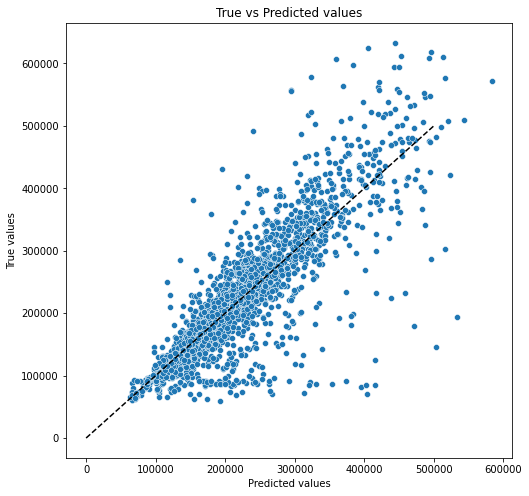

In [379]:
evaluate_preds(y_test_rf, y_pred_rf_test)

In [380]:
best_rf_model.feature_importances_

array([0.0299339 , 0.42255737, 0.03150492, 0.01675076, 0.01918223,
       0.01566925, 0.02433015, 0.01500456, 0.01843774, 0.02137431,
       0.02272055, 0.01504365, 0.00580018, 0.00774651, 0.33394392])

**Feature Importances for test dataset**

In [ ]:
feature_importances_df = pd.DataFrame(zip(X_train_rf.columns, 
                                       best_rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances_df.sort_values(by='importance', ascending=False, inplace=True)

In [ ]:
feature_importances_df

In [ ]:
f, ax = plt.subplots(figsize=(4, 4))
sns.barplot(y=feature_importances_df.feature_name, x=feature_importances_df.importance)

plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title("the most important features")
plt.show()

**Prediction for whole dataset**

In [381]:
y_pred_rf = best_rf_model.predict(X_rf)

R2:	0.882
RMSE:	31946.979
MSE:	1020609480.8


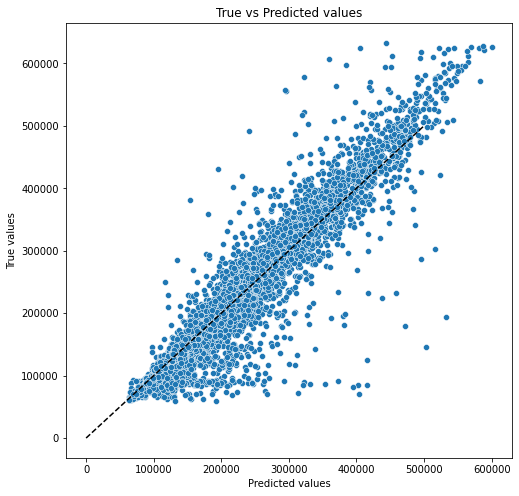

In [382]:
evaluate_preds(y_rf, y_pred_rf)

**Model Validation**

In [384]:
df_real_rf = pd.read_csv("D:/Learning/GeekBrains/numpy and pandas/test.csv", index_col='Id')

**Applying changes to validation model**

In [385]:
df_real_rf = dp.data_clearing (df_real_rf)

In [386]:
df_real_rf = dp.null_populating_hc(df_real_rf)

In [387]:
df_real_rf = dp.null_populating_ls(df_real_rf)

In [388]:
df_real_rf = dp.district_id_processing(df_real_rf)

In [389]:
df_real_rf.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,hl_pd,Avg_Price_per_district
Id,,,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,B,B,11,2748,1,58,0,0,B,1084.0,162287.0
15856,74,2.0,69.263183,63.263183,3.0,1.0,1.0,1977,0.075779,B,B,6,1437,3,74,0,2,B,990.0,210696.0
5480,190,1.0,13.597819,-1.402181,12.0,2.0,5.0,1909,0.000000,B,B,30,7538,87,190,5,5,B,4702.0,471967.0
15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,B,B,23,4583,3,47,3,3,B,240.0,213626.0
14275,27,1.0,47.527111,43.387569,3.0,17.0,17.0,2017,0.072158,B,B,2,629,1,27,0,0,A,240.0,156046.0


In [390]:
df_real_rf = df_real_rf.drop('hl_pd', axis = 1)
df_real_rf = df_real_rf.drop('DistrictId', axis = 1)

In [391]:
X_rl_rf = df_real_rf.copy()

In [392]:
X_rl_rf = X_rl_rf.drop(['Ecology_2','Ecology_3', 'Shops_2'], axis = 1)

In [393]:
y_pred_rl_rf = best_rf_model.predict(X_rl_rf)

In [394]:
y_pred_rl_rf

array([161966.89136185, 199585.22376551, 294042.79781354, ...,
       294110.81800431, 187665.32493007, 174021.9805272 ])

In [395]:
res_rl_rf = pd.Series(y_pred_rl_rf)

In [396]:
submission_rl_rf = X_rl_rf.index

In [397]:
frame_rl_rf = {'Id':submission_rl_rf, 'Price': res_rl_rf}

In [398]:
submission_result_rl_rf = pd.DataFrame(frame_rl_rf)

In [399]:
submission_result_rl_rf.head()

,Id,Price
0,725,161966.891362
1,15856,199585.223766
2,5480,294042.797814
3,15664,329378.011058
4,14275,147842.406104


In [400]:
submission_result_rl_rf.shape

(5000, 2)

In [401]:
submission_result_rl_rf.to_csv('D:/Learning/GeekBrains/numpy and pandas/result.csv', index = False)

**Conclusion about random forest model:**

Random forest significantly increases prediction value relatively Linear model.  

## Gradient Boosting

Gradient boosting model applying

In [614]:
X_gb = df_fill.copy()

In [615]:
X_gb.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Shops_1,Price,hl_pd,Avg_Price_per_district,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33,...,11,184966.930730,770.0,219720.0,0,1,0,1,0,1
15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46,...,16,300009.450063,320.0,225919.0,0,1,0,1,0,1
4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,34,...,3,220925.908524,229.0,255736.0,0,1,0,1,0,1
5809,58,2.0,53.352981,41.352981,9.0,8.0,17.0,1977.0,0.437885,23,...,5,175616.227217,1084.0,162287.0,0,1,0,1,0,1
10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35,...,4,150226.531644,2078.0,184157.0,0,1,0,1,0,1


**Dataset preprocessing.**

For validation dataset preprocessign same data will be used as for training datasets.

In [616]:
y_gb = X_gb['Price']

In [617]:
X_gb = X_gb.drop(['Price'], axis = 1)

Splitting training dataset to train and test sub datasets.

In [ ]:
#X_gb = X_gb.drop('DistrictId', axis = 1)

Based on experience of work with current dataset, some features can be deleted.

In [406]:
X_gb = X_gb.drop(['Ecology_2', 'Ecology_3','Shops_2'], axis = 1)

Splitting of dataset to training and test.

In [618]:
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb, y_gb, test_size=0.3, random_state = 44)

**Selecting of optimal parameters for dataset.**

In [619]:
gb_model = GradientBoostingRegressor(criterion='mse',
                          # min_samples_leaf=10,
                          random_state=44,
                         # n_estimators=100,
                         # max_depth=7
                         )

params = {'n_estimators': range(200, 701, 100), 
          'max_depth': range(2, 10, 2),
         #'min_samples_leaf':[20, 30, 40]                   
         }

In [620]:
params = {'n_estimators': range(100, 1001, 50), 
          'max_depth': range(2, 15, 2)
         #'min_samples_leaf':[20, 30, 40]                   
         }

Applying of gread search to selecting of the most optimal set of meth-parameters.

In [621]:
gs = GridSearchCV(gb_model, params, 
                  scoring='r2', # r2 score metric 
                  cv=KFold(n_splits=5,   # k number of fold in cross validation
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )

In [622]:
%%time
gs.fit(X_train_gb, y_train_gb)

Wall time: 1h 2min 55s


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=GradientBoostingRegressor(criterion='mse',
                                                 random_state=44),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 15, 2),
                         'n_estimators': range(100, 1001, 50)},
             scoring='r2')

In [623]:
gs.best_params_

{'max_depth': 6, 'n_estimators': 100}

Best params are {'max_depth': 6, 'n_estimators': 100}

In [624]:
gs.best_score_

0.741610990918805

In [625]:
best_gb_model = gs.best_estimator_

In [626]:
y_pred_gb = best_gb_model.predict(X_test_gb)
# evaluate_preds(y_train, y_train_preds)

**Selected model evaluation**

R2:	0.766
RMSE:	44911.542
MSE:	2017046567.839


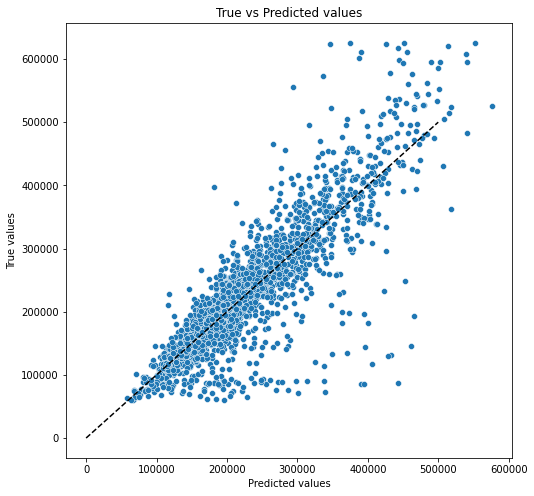

In [627]:
evaluate_preds(np.squeeze(y_test_gb.values), y_pred_gb)

In [628]:
y_pred_gb_full = best_gb_model.predict(X_gb)

In [629]:
best_gb_model.feature_importances_

array([6.96737157e-03, 3.12576409e-02, 4.40550608e-01, 1.99120818e-02,
       1.73560164e-02, 7.57719421e-03, 1.62341228e-02, 2.65192636e-02,
       1.17890126e-02, 1.53399828e-02, 2.11740929e-02, 2.04714682e-02,
       6.50177289e-03, 2.78619850e-03, 6.20416160e-03, 1.02564738e-02,
       3.37197616e-01, 1.29358749e-04, 7.77039295e-05, 3.32193670e-04,
       1.73592725e-04, 6.96384489e-04, 4.95687947e-04])

In [630]:
feature_importances_df = pd.DataFrame(zip(X_train_gb.columns, 
                                       best_gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances_df.sort_values(by='importance', ascending=False, inplace=True)

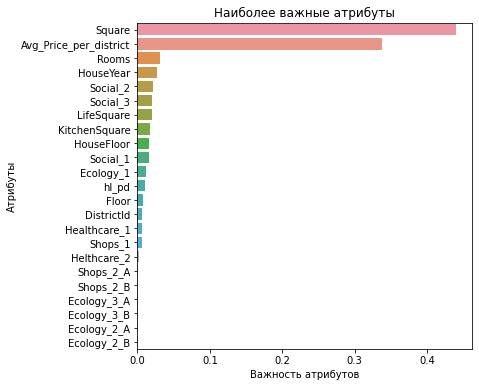

In [631]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.feature_name, x=feature_importances_df.importance)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [632]:
gb_mean_sqe_error = mean_squared_error(y_pred_gb, y_test_gb)
gb_mean_sqe_error

2017046567.8389218

In [633]:
gb_mean_abs_error = mean_absolute_error(y_pred_gb, y_test_gb)
gb_mean_abs_error

26786.875914460677

In [634]:
gb_r2_score = r2_score(y_pred_gb, y_test_gb)
gb_r2_score

0.6906406934432454

In [635]:
r2_score(y_pred_gb_full, y_gb)

0.8322703463409755

In [636]:
df_res = pd.DataFrame([['Gradient Boosting','Yes',gb_r2_score,gb_mean_abs_error,gb_mean_sqe_error]], columns = result.columns)
result = result.append(df_res)

**Validate data  on validation model**

In [639]:
df_fill.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Shops_1,Price,hl_pd,Avg_Price_per_district,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33,...,11,184966.930730,770.0,219720.0,0,1,0,1,0,1
15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46,...,16,300009.450063,320.0,225919.0,0,1,0,1,0,1
4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,34,...,3,220925.908524,229.0,255736.0,0,1,0,1,0,1
5809,58,2.0,53.352981,41.352981,9.0,8.0,17.0,1977.0,0.437885,23,...,5,175616.227217,1084.0,162287.0,0,1,0,1,0,1
10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35,...,4,150226.531644,2078.0,184157.0,0,1,0,1,0,1


In [637]:
df_real_gb = pd.read_csv("D:/Learning/GeekBrains/numpy and pandas/test.csv", index_col='Id')

In [638]:
df_real_gb = dp.data_clearing (df_real_gb)
df_real_gb = dp.null_populating_hc(df_real_gb)
df_real_gb = dp.null_populating_ls(df_real_gb)
df_real_gb = dp.district_id_processing(df_real_gb)

In [640]:
df_real_gb = pd.get_dummies(df_real_gb, columns = df_cat_features.columns)

In [428]:
df_real_gb = df_real_gb.drop('hl_pd', axis = 1)
df_real_gb = df_real_gb.drop('DistrictId', axis = 1)

In [429]:
df_real_gb = df_real_gb.drop(['Ecology_2','Ecology_3', 'Shops_2'], axis = 1)

In [641]:
X_rl_gb = df_real_gb.copy()

In [642]:
y_pred_rl_gb = best_gb_model.predict(X_rl_gb)

In [643]:
res_rl_gb = pd.Series(y_pred_rl_gb)

In [644]:
submission_rl_gb = X_rl_gb.index

In [645]:
frame_rl_gb = {'Id':submission_rl_gb, 'Price': res_rl_gb}

In [646]:
submission_result_rl_gb = pd.DataFrame(frame_rl_gb)

In [647]:
submission_result_rl_gb.shape

(5000, 2)

In [648]:
submission_result_rl_gb.to_csv('D:/Learning/GeekBrains/numpy and pandas/result.csv', index = False)

**Conclusion**

Gradient Boosting predisctions has the highest prediction e2 score from all tested models.


## CatBoost

**Import validation file**

In [649]:
df_real_cb = pd.read_csv("D:/Learning/GeekBrains/numpy and pandas/test.csv", index_col='Id')

**Copy training dataset**

In [650]:
df_real_cb = dp.data_clearing (df_real_cb)
df_real_cb = dp.null_populating_hc(df_real_cb)
df_real_cb = dp.null_populating_ls(df_real_cb)
df_real_cb = dp.district_id_processing(df_real_cb)



In [651]:
df_real_cb = pd.get_dummies(df_real_cb, columns = df_cat_features.columns)

In [ ]:
df_real_cb = df_real_cb.drop('hl_pd', axis = 1)


In [490]:
df_real_cb = df_real_cb.drop('DistrictId', axis = 1)

In [652]:
X_cb = df_fill.copy()

In [653]:
y_cb = X_cb['Price']

In [654]:
X_cb = X_cb.drop('Price', axis = 1)

**split dataset**

In [655]:
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y_cb, test_size=0.3, random_state = 4)

**selecting params and model applying**

In [656]:
params = {"iterations": range(40, 201, 20),
          "depth": range(2, 11, 1)          
          }

In [657]:
model_cb = CatBoostRegressor(loss_function="RMSE", verbose=False)

In [658]:
gcb = GridSearchCV(model_cb, params, 
                  scoring='r2', # r2 score metric 
                  cv=KFold(n_splits=5,   # k number of fold in cross validation
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )

In [659]:
index_no = []

In [661]:
index_no.append(X_cb.columns.get_loc('Ecology_2_A'))
index_no.append(X_cb.columns.get_loc('Ecology_3_A'))
index_no.append(X_cb.columns.get_loc('Shops_2_A'))

In [662]:
index_no.append(X_cb.columns.get_loc('Ecology_2_B'))
index_no.append(X_cb.columns.get_loc('Ecology_3_B'))
index_no.append(X_cb.columns.get_loc('Shops_2_B'))

In [664]:
index_no.sort()

In [665]:
index_no

[17, 18, 19, 20, 21, 22]

In [666]:
%%time
gcb.fit(X_train_cb, y_train_cb, cat_features = index_no)

Wall time: 6min 39s


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x000001E5339AA430>,
             n_jobs=-1,
             param_grid={'depth': range(2, 11),
                         'iterations': range(40, 201, 20)},
             scoring='r2')

In [458]:
gcb.best_params_

{'depth': 8, 'iterations': 200}

In [459]:
gcb.best_score_

0.7651334052611235

In [460]:
best_cb_model = gcb.best_estimator_

**validation of train model**

In [483]:
y_pred_train_cb = best_cb_model.predict(X_train_cb)

In [484]:
cb_r2_train_score = r2_score(y_pred_train_cb, y_train_cb)
cb_r2_train_score

0.9142751309376644

**validation of test model**

In [485]:
y_pred_test_cb = best_cb_model.predict(X_test_cb)

In [486]:
cb_r2_test_score = r2_score(y_pred_test_cb, y_test_cb)
cb_r2_test_score

0.6727282232013301

**Processing real dataset to fit initial**

In [466]:
df_real_cb = pd.read_csv("D:/Learning/GeekBrains/numpy and pandas/test.csv", index_col='Id')

In [467]:
df_real_cb = dp.data_clearing (df_real_cb)
df_real_cb = dp.null_populating_hc(df_real_cb)
df_real_cb = dp.null_populating_ls(df_real_cb)
df_real_cb = dp.district_id_processing(df_real_cb)


In [468]:
df_real_cb = df_real_cb.drop('hl_pd', axis = 1)
df_real_cb = df_real_cb.drop('DistrictId', axis = 1)


In [469]:
X_rl_cb = df_real_cb.copy()

In [470]:
y_pred_rl_cb = best_cb_model.predict(X_rl_cb)

In [471]:
res_rl_cb = pd.Series(y_pred_rl_cb)

In [472]:
submission_rl_cb = X_rl_cb.index

In [473]:
frame_rl_cb = {'Id':submission_rl_cb, 'Price': res_rl_cb}

In [474]:
submission_result_rl_cb = pd.DataFrame(frame_rl_cb)

In [475]:
submission_result_rl_cb.shape

(5000, 2)

In [476]:
submission_result_rl_cb.to_csv('D:/Learning/GeekBrains/numpy and pandas/result.csv', index = False)

# 6. Conclusions <a class='anchor' id='conclusions'>

**Dataset**

Initial and training datasets have big amount of features which do no have influence on prediction accuracy.
Also changing categorial variables using get_dummies function almost does not have influence on funal accuracy of predictions for this current dataset.
Big mount of NaN in some columns requires their population or complete removing of features with big amount of gaps in data.

**Model Selection**

Random Forest model has the best accuracy comparable accuracy　from all models applied.
Gradient boosting have slightly higher R2 score but for current dataset in can be relative to more sucessful set of metha parameters.



**Potential ways for result improvement**

Available ways for r2 scorw increasing:
- improve process of feature preprocessing
- use regularisation of features insted of normalisation
- try to use PCA dimensional reducing
- use more efficeiant models like xgboosting

In [ ]:
# s = pd.Series([_ for _ in range(1, result.shape[0] + 1)])
# result.set_index(s)

In [ ]:
gc.collect